In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Mainstay

In [2]:
df = pd.read_csv('data/spotify_daily_charts.csv')
df['date'] = pd.to_datetime(df['date'])
df.columns

Index(['date', 'position', 'track_id', 'track_name', 'artist', 'streams'], dtype='object')

In [3]:
#filtering songs that charted in the top 20 and above at least once
top20only = df[df['position'] <= 20]
top20only

,date,position,track_id,track_name,artist,streams
0,2017-01-01,1,0kN8xEmgMW9mh7UmDYHlJP,Versace on the Floor,Bruno Mars,185236
1,2017-01-01,2,5uCax9HTNlzGybIStD3vDh,Say You Won't Let Go,James Arthur,180552
2,2017-01-01,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,158720
3,2017-01-01,4,2rizacJSyD9S1IQUxUxnsK,All We Know,The Chainsmokers,130874
4,2017-01-01,5,5MFzQMkrl1FOOng9tq6R9r,Don't Wanna Know,Maroon 5,129656
...,...,...,...,...,...,...
319415,2021-05-20,16,37BZB0z9T8Xu7U3e65qxFy,Save Your Tears (with Ariana Grande) (Remix),The Weeknd,118334
319416,2021-05-20,17,67BtfxlNbhBmCDR2L2l8qd,MONTERO (Call Me By Your Name),Lil Nas X,115449
319417,2021-05-20,18,4saklk6nie3yiGePpBwUoc,Dynamite,BTS,110053
319418,2021-05-20,19,7F1CiKqrY44kh5cDqwHOnx,Love Is Gone - Acoustic,SLANDER,105012


In [4]:
top20only['track_id'].nunique()

558

In [5]:
#Find songs that stay in the charts for at least 360 days
year_charter = (df['track_id'].value_counts() >= 360).to_frame()
year_charter = year_charter.index.tolist()
len(year_charter), year_charter

(3495,
 ['5uCax9HTNlzGybIStD3vDh',
  '6NFKf8vBApSvtzkapYmnVR',
  '6C2nrsOlb3jOUGcJAmPrTA',
  '3S0OXQeoh0w6AY8WQVckRW',
  '135ggzbjOogZ75IQ0LQi8r',
  '4llK75pXNWZz6KAho2Gp16',
  '6fxVffaTuwjgEk5h9QyRjy',
  '0tgVpDi06FyKpA1z0VMD4v',
  '2qLMf6TuEC3ruGJg4SMMN6',
  '6XmskR1cMfgys1W7dExmgi',
  '1MkiRsYBkXbXvdiYvTTiQT',
  '4JSDhJVmo2UqdF7nxbyenn',
  '7sW3f7PqDV7BQ7qqeVBJIA',
  '3OpGUlDmRUXh0NkIYWoIlD',
  '2YlZnw2ikdb837oKMKjBkW',
  '1mXVgsBdtIVeCLJnSnmtdV',
  '1HwpWwa6bnqqRhK8agG4RS',
  '5zMR44ZH4KVZj4FlhTj3SE',
  '39afswHs17v53znQm1gDTY',
  '3WUEs51GpcvlgU7lehLgLh',
  '6Qyc6fS4DsZjB2mRW9DsQs',
  '4OBZT9EnhYIV17t4pGw7ig',
  '7BKLCZ1jbUBVqRi2FVlTVw',
  '630sXRhIcfwr2e4RdNtjKN',
  '7BqBn9nzAq8spo5e7cZ0dJ',
  '1yDiru08Q6omDOGkZMPnei',
  '6wdCelHrPh7UfliNjwRTUv',
  '0YyM8aEdbjGfLWPn6fdcn7',
  '4u8RkgV6P4TLi89SmlUtv8',
  '5UhpceEr5XmbVwyoIUIRnh',
  '00mBzIWv5gHOYxwuEJXjOG',
  '6xQs6y6CpDqK9VKCktApEL',
  '6lanRgr6wXibZr8KgzXxBl',
  '2PkQeKapTNUjwpKLf8aJlq',
  '2IMODbij0lZ5CuAjZi0IDE',
  '2P91MQbaiQ

In [6]:
mainstays = top20only[top20only['track_id'].isin(year_charter)]
mainstays['track_id'].nunique()

558

In [7]:
mainstays.shape

(31960, 6)

In [8]:
tracks_df = pd.read_csv('data/spotify_daily_charts_tracks.csv')

In [9]:
mainstay_features = mainstays.merge(tracks_df, on='track_id', how='left')

In [10]:
mainstays.sort_values(by='streams', ascending=False)

,date,position,track_id,track_name,artist,streams
273400,2020-10-02,1,4Ws314Ylb27BVsvlZOy30C,Lovesick Girls,BLACKPINK,670517
273401,2020-10-02,2,7iAgNZdotu40NwtoIWJHFe,Bet You Wanna (feat. Cardi B),BLACKPINK,581551
273600,2020-10-03,1,4Ws314Ylb27BVsvlZOy30C,Lovesick Girls,BLACKPINK,575709
273402,2020-10-02,3,1XnpzbOGptRwfJhZgLbmSr,Pretty Savage,BLACKPINK,542131
273800,2020-10-04,1,4Ws314Ylb27BVsvlZOy30C,Lovesick Girls,BLACKPINK,518778
...,...,...,...,...,...,...
28019,2017-05-21,20,7KXjTSCq5nL1LoYtL7XAwS,HUMBLE.,Kendrick Lamar,70647
72418,2018-01-01,19,6mrKP2jyIQmM0rw6fQryjr,Let You Down,NF,70315
72419,2018-01-01,20,1NDxZ7cFAo481dtYWdrUnR,Pretty Girl - Cheat Codes X CADE Remix,Maggie Lindemann,70222
20618,2017-04-14,19,4nMlau89VAjmV7agkl7OY3,Fresh Eyes,Andy Grammer,68503


# Cross check with TikTok

In [11]:
# read and process the charts dataset
charts_df2 = pd.read_csv('data/TikTok_playlist_tracks.csv')
#transform date column into a datetime column
charts_df2.head()

,track_id,name,popularity,duration_ms,artist_id,artist_name,num_artists,playlist_id,playlist_name
0,3BZEcbdtXQSo7OrvKRJ6mb,MONTERO (Call Me By Your Name),80,137875,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,1,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021
1,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),99,198081,"['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...","['Justin Bieber', 'Daniel Caesar', 'Giveon']",3,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021
2,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,96,132780,1uU7g3DNSbsu0QjSEqZtEd,Masked Wolf,1,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021
3,748mdHapucXQri7IAO8yFK,Kiss Me More (feat. SZA),98,208866,"['5cj0lLjcoR7YOSnhnX0Po5', '7tYKF4w9nC0nq9CsPZ...","['Doja Cat', 'SZA']",2,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021
4,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,"['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...","['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",3,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021


In [12]:
# read and process the tracks dataset (global)
tracks_df2 = pd.read_csv('data/TikTok_playlist_tracks_data.csv')
tracks_df2.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name
0,3BZEcbdtXQSo7OrvKRJ6mb,MONTERO (Call Me By Your Name),7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,5iZytG7j5DDp9RlsmkGI97,137875,2021-03-26,80,0.610,0.508,...,-6.682,0,0.1520,0.297,0.000000,0.3840,0.758,178.818,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021
1,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),1uNFoZAHBGtllmzznpCI3s,Justin Bieber,5dGWwsZ9iB2Xc3UKR0gif2,198081,2021-03-19,99,0.677,0.696,...,-6.181,1,0.1190,0.321,0.000000,0.4200,0.464,90.030,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021
2,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,1uU7g3DNSbsu0QjSEqZtEd,Masked Wolf,7vus4Q8r5DS2Dl1JClxEsA,132780,2021-01-06,96,0.778,0.695,...,-6.865,0,0.0913,0.175,0.000000,0.1500,0.472,149.996,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021
3,748mdHapucXQri7IAO8yFK,Kiss Me More (feat. SZA),5cj0lLjcoR7YOSnhnX0Po5,Doja Cat,1OnzqJTL9bwe4kvaLxRYxt,208866,2021-04-09,98,0.762,0.701,...,-3.541,1,0.0286,0.235,0.000158,0.1230,0.742,110.968,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021
4,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,0du5cEVh5yTK9QJze8zA0C,Bruno Mars,7dfPqXck6BB9wpThrVYBss,242096,2021-03-05,96,0.586,0.616,...,-7.964,1,0.0324,0.182,0.000000,0.0927,0.719,148.088,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021


In [13]:
#merge the charts and tracks dataset
tiktok_df = charts_df2.merge(tracks_df2, on='track_id', how='left')
tiktok_df = tiktok_df.drop(columns='playlist_id_y')
tiktok_df = tiktok_df.drop(columns='playlist_name_y')
tiktok_df = tiktok_df.rename(columns={'track_name_x':'track_name'})
tiktok_df

,track_id,name,popularity_x,duration_ms,artist_id_x,artist_name_x,num_artists,playlist_id_x,playlist_name_x,track_name,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,3BZEcbdtXQSo7OrvKRJ6mb,MONTERO (Call Me By Your Name),80,137875,7jVv8c5Fj3E9VhNjxT4snq,Lil Nas X,1,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021,MONTERO (Call Me By Your Name),...,0.508,8.0,-6.682,0.0,0.1520,0.2970,0.000000,0.3840,0.758,178.818
1,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),99,198081,"['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...","['Justin Bieber', 'Daniel Caesar', 'Giveon']",3,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021,Peaches (feat. Daniel Caesar & Giveon),...,0.696,0.0,-6.181,1.0,0.1190,0.3210,0.000000,0.4200,0.464,90.030
2,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,96,132780,1uU7g3DNSbsu0QjSEqZtEd,Masked Wolf,1,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021,Astronaut In The Ocean,...,0.695,4.0,-6.865,0.0,0.0913,0.1750,0.000000,0.1500,0.472,149.996
3,748mdHapucXQri7IAO8yFK,Kiss Me More (feat. SZA),98,208866,"['5cj0lLjcoR7YOSnhnX0Po5', '7tYKF4w9nC0nq9CsPZ...","['Doja Cat', 'SZA']",2,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021,Kiss Me More (feat. SZA),...,0.701,8.0,-3.541,1.0,0.0286,0.2350,0.000158,0.1230,0.742,110.968
4,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,"['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...","['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",3,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021,Leave The Door Open,...,0.616,5.0,-7.964,1.0,0.0324,0.1820,0.000000,0.0927,0.719,148.088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4339,1QttDfIdwAgyNFB45nUDDp,Modern Flame,42,185088,"['3VVLqeEqQQqTgT8YhfY9Z6', '3kHVioJpVxlazAAKQ6...","['Emmit Fenn', 'Yuna']",2,7gA7tNAZW9VykmyPPIat6N,Ultimate TikTok Gym Playlist ✨,Modern Flame,...,0.524,5.0,-8.885,0.0,0.1030,0.1280,0.004380,0.3620,0.240,142.046
4340,7k51pIqTGEHHZOnpI11Qq2,Won't Bite,73,195213,"['5cj0lLjcoR7YOSnhnX0Po5', '1ybINI1qPiFbwDXamR...","['Doja Cat', 'Smino']",2,7gA7tNAZW9VykmyPPIat6N,Ultimate TikTok Gym Playlist ✨,Won't Bite,...,0.783,5.0,-3.115,1.0,0.0965,0.3510,0.000000,0.1400,0.592,127.996
4341,0uH6JssU7mWkTT9mqeqEvL,Just Like Me (feat. Young Thug),69,220888,"['31W5EY0aAly4Qieq6OFu6I', '50co4Is1HCEo8bhOyU...","['A Boogie Wit da Hoodie', 'Young Thug']",2,7gA7tNAZW9VykmyPPIat6N,Ultimate TikTok Gym Playlist ✨,Just Like Me (feat. Young Thug),...,0.623,5.0,-7.871,1.0,0.2450,0.1560,0.000000,0.0955,0.393,128.661
4342,31I3Rt1bPa2LrE74DdNizO,Flashing Lights,78,237506,"['5K4W6rqBFWDnAN6FQUkS6x', '7u6LfVyYpEzMpHLL7j...","['Kanye West', 'Dwele']",2,7gA7tNAZW9VykmyPPIat6N,Ultimate TikTok Gym Playlist ✨,Flashing Lights,...,0.628,6.0,-7.578,0.0,0.0399,0.0381,0.000000,0.3860,0.430,90.482


In [14]:
#check if SB19 is in tiktok playlist
SB19_tiktok = tiktok_df[tiktok_df['artist_name_x']=='SB19']
SB19_tiktok

,track_id,name,popularity_x,duration_ms,artist_id_x,artist_name_x,num_artists,playlist_id_x,playlist_name_x,track_name,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo


In [15]:
# read and process the charts dataset
charts_df3 = pd.read_csv('data/TIKTOK PHILIPPINES_playlist_tracks.csv')
tracks_df3 = pd.read_csv('data/TIKTOK PHILIPPINES_playlist_tracks_data.csv')
tiktokph_df = charts_df3.merge(tracks_df3, on='track_id', how='left')
tiktokph_df = tiktokph_df.drop(columns='playlist_id_y')
tiktokph_df = tiktokph_df.drop(columns='playlist_name_y')
tiktokph_df = tiktokph_df.rename(columns={'track_name_x':'track_name'})
tiktokph_df

,track_id,name,popularity_x,duration_ms,artist_id_x,artist_name_x,num_artists,playlist_id_x,playlist_name_x,track_name,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7BoobGhD4x5K96Me0hqC8Q,Build a Bitch,89,122772,26cMerAxjx9GedFt0lMDjm,Bella Poarch,1,4ER4T6CVRbCVLrEkRUdIni,TikTok Philippines - Booty Work - Caroline (Ki...,Build a Bitch,...,0.463,3.0,-7.454,1.0,0.0367,0.2170,0.000018,0.3470,0.866,102.931
1,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),75,238800,"['3aQeKQSyrW4qWr35idm0cy', '0z4gvV4rjIZ9wHck67...","['T-Pain', 'Akon']",2,4ER4T6CVRbCVLrEkRUdIni,TikTok Philippines - Booty Work - Caroline (Ki...,Bartender (feat. Akon),...,0.391,8.0,-8.504,1.0,0.0628,0.0564,0.000000,0.2240,0.436,104.961
2,1xNWu0d2H5RSfFul3ZsRuk,Dream Killer,34,144000,"['7BJYwgRr5jyyEzvXJx4YSd', '0iV4UAD683ZDnqSHhs...","['Sebastian Rhodes', 'Holliday Howe']",2,4ER4T6CVRbCVLrEkRUdIni,TikTok Philippines - Booty Work - Caroline (Ki...,Dream Killer,...,0.765,10.0,-6.924,1.0,0.1710,0.0930,0.000000,0.3900,0.743,177.075
3,3nY8AqaMNNHHLYV4380ol0,Dick (feat. Doja Cat),86,175238,"['2WgfkM8S11vg4kxLgDY3F5', '5cj0lLjcoR7YOSnhnX...","['StarBoi3', 'Doja Cat']",2,4ER4T6CVRbCVLrEkRUdIni,TikTok Philippines - Booty Work - Caroline (Ki...,Dick (feat. Doja Cat),...,0.608,9.0,-6.831,1.0,0.4200,0.1300,0.000000,0.0584,0.474,125.994
4,7ahAom5NZZVEMRynCruscZ,Ever After,59,302213,1mCY2mHctggfYiEqpCgcSz,Bonnie Bailey,1,4ER4T6CVRbCVLrEkRUdIni,TikTok Philippines - Booty Work - Caroline (Ki...,Ever After,...,0.614,11.0,-10.138,0.0,0.0427,0.2310,0.003320,0.0832,0.566,127.014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,2AfxqgCxX8W85d49TOqVnl,Goddess Kinda Power,61,169400,5iLaZnrGlRUHm2PwZ33dIt,Josefine,1,3axkimfKPLZpXEf5x8YCZK,Tiktok Philippines 2021 (Tiktok Filipino 2021),Goddess Kinda Power,...,0.570,2.0,-7.266,0.0,0.0382,0.0989,0.000002,0.1650,0.470,105.018
1555,1IIKrJVP1C9N7iPtG6eOsK,Go Crazy,83,176960,"['7bXgB6jMjp9ATFy66eO08Z', '50co4Is1HCEo8bhOyU...","['Chris Brown', 'Young Thug']",2,3axkimfKPLZpXEf5x8YCZK,Tiktok Philippines 2021 (Tiktok Filipino 2021),Go Crazy,...,0.578,0.0,-8.932,0.0,0.1450,0.3160,0.000000,0.2500,0.581,94.148
1556,0y9fkzOaaQy4Up22BGUbIp,Backyard Boy,11,129240,3V0ZQW0dNuVaFtbVYgSI24,Claire Rosinkranz,1,3axkimfKPLZpXEf5x8YCZK,Tiktok Philippines 2021 (Tiktok Filipino 2021),Backyard Boy,...,0.642,5.0,-7.037,1.0,0.1890,0.3360,0.000000,0.0735,0.452,138.026
1557,0Pq9K4yZlPwjjRMeIkBCpg,Wishful Drinking,59,195110,5DD5GZd4ElmQTy9NleMvKJ,Tessa Violet,1,3axkimfKPLZpXEf5x8YCZK,Tiktok Philippines 2021 (Tiktok Filipino 2021),Wishful Drinking,...,0.350,7.0,-7.818,0.0,0.3050,0.5490,0.000005,0.1170,0.402,68.015


In [16]:
#check if SB19 is in tiktok playlist (ph)
SB19_tiktok = tiktokph_df[tiktokph_df['artist_name_x']=='SB19']
SB19_tiktok

,track_id,name,popularity_x,duration_ms,artist_id_x,artist_name_x,num_artists,playlist_id_x,playlist_name_x,track_name,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo


In [17]:
mainstay_tiktok = tiktok_df[tiktok_df['track_id'].isin(mainstays['track_id'])]
mainstay_tiktok

,track_id,name,popularity_x,duration_ms,artist_id_x,artist_name_x,num_artists,playlist_id_x,playlist_name_x,track_name,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),99,198081,"['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...","['Justin Bieber', 'Daniel Caesar', 'Giveon']",3,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021,Peaches (feat. Daniel Caesar & Giveon),...,0.696,0.0,-6.181,1.0,0.1190,0.321000,0.000000,0.4200,0.464,90.030
3,748mdHapucXQri7IAO8yFK,Kiss Me More (feat. SZA),98,208866,"['5cj0lLjcoR7YOSnhnX0Po5', '7tYKF4w9nC0nq9CsPZ...","['Doja Cat', 'SZA']",2,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021,Kiss Me More (feat. SZA),...,0.701,8.0,-3.541,1.0,0.0286,0.235000,0.000158,0.1230,0.742,110.968
4,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,242096,"['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...","['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']",3,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021,Leave The Door Open,...,0.616,5.0,-7.964,1.0,0.0324,0.182000,0.000000,0.0927,0.719,148.088
11,7igeByaBM0MgGsgXtNxDJ7,positions,22,172324,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,1,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021,positions,...,0.802,0.0,-4.759,1.0,0.0864,0.468000,0.000000,0.0940,0.675,144.005
14,7BoobGhD4x5K96Me0hqC8Q,Build a Bitch,91,122772,26cMerAxjx9GedFt0lMDjm,Bella Poarch,1,65LdqYCLcsV0lJoxpeQ6fW,TikTok Songs 2021 Tik Tok Hits ⚡Summer 2021,Build a Bitch,...,0.463,3.0,-7.454,1.0,0.0367,0.217000,0.000018,0.3470,0.866,102.931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4169,2Fxmhks0bxGSBdJ92vM42m,bad guy,87,194087,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,1,7gA7tNAZW9VykmyPPIat6N,Ultimate TikTok Gym Playlist ✨,bad guy,...,0.425,7.0,-10.965,1.0,0.3750,0.328000,0.130000,0.1000,0.562,135.128
4172,0E4Y1XIbs8GrAT1YqVy6dq,Afterglow,84,185486,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,1,7gA7tNAZW9VykmyPPIat6N,Ultimate TikTok Gym Playlist ✨,Afterglow,...,0.324,11.0,-5.851,1.0,0.0299,0.698000,0.000000,0.3280,0.273,110.184
4179,4saklk6nie3yiGePpBwUoc,Dynamite,91,199053,3Nrfpe0tUJi4K4DXYWgMUX,BTS,1,7gA7tNAZW9VykmyPPIat6N,Ultimate TikTok Gym Playlist ✨,Dynamite,...,0.765,6.0,-4.410,0.0,0.0993,0.011200,0.000000,0.0936,0.737,114.044
4257,1tkg4EHVoqnhR6iFEXb60y,What You Know Bout Love,87,160000,0eDvMgVFoNV3TpwtrVCoTj,Pop Smoke,1,7gA7tNAZW9VykmyPPIat6N,Ultimate TikTok Gym Playlist ✨,What You Know Bout Love,...,0.548,10.0,-8.493,1.0,0.3530,0.650000,0.000002,0.1330,0.543,83.995


In [18]:
list(mainstay_tiktok.columns)

['track_id',
 'name',
 'popularity_x',
 'duration_ms',
 'artist_id_x',
 'artist_name_x',
 'num_artists',
 'playlist_id_x',
 'playlist_name_x',
 'track_name',
 'artist_id_y',
 'artist_name_y',
 'album_id',
 'duration',
 'release_date',
 'popularity_y',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo']

In [19]:
charts_df4 = pd.read_csv('data/spotify_daily_charts.csv')

In [20]:
tracks_df4 = pd.read_csv('data/spotify_daily_charts_tracks.csv')

In [21]:
df4 = charts_df4.merge(tracks_df4, on='track_id', how='left')

In [22]:
SB19 = df4[(df4['artist']=='SB19')]
SB19_unique = SB19.drop(['date','streams','position','track_id','track_name_y','artist_id','artist_name','album_id'], axis = 1)
SB19_unique = SB19_unique.drop_duplicates()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


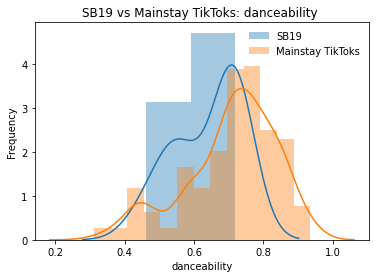

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


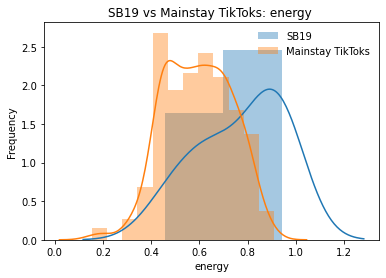

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


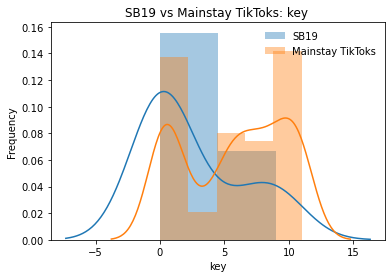

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


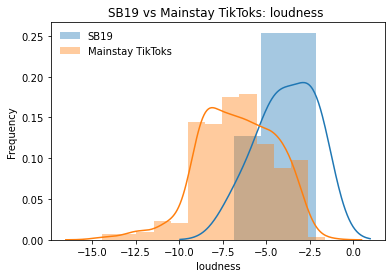

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


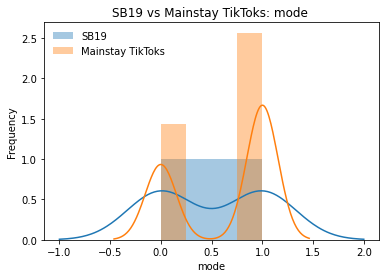

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


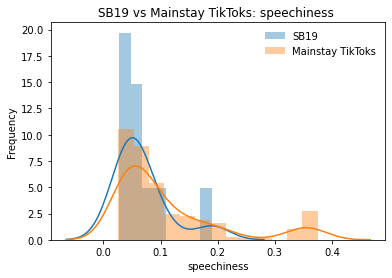

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


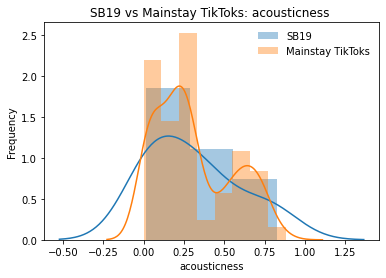

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


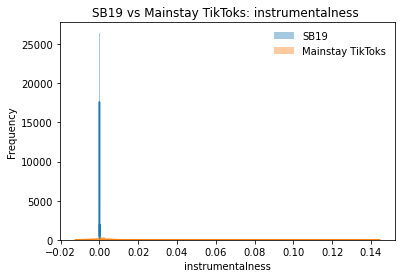

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


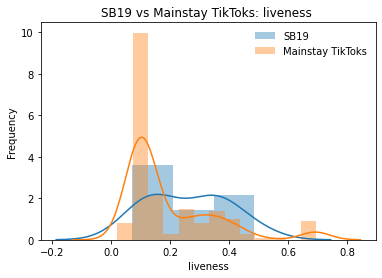

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


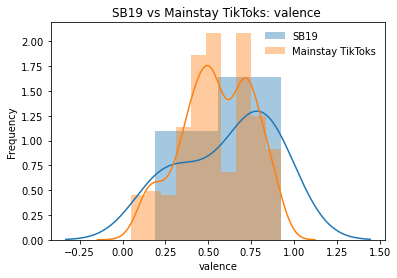

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


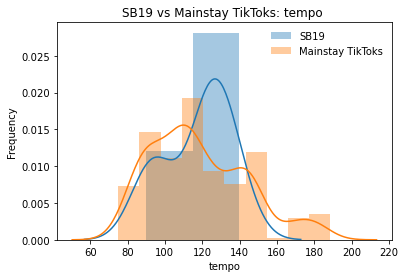

In [23]:
#SB19 vs mainstay tiktoks
for col in ['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    fig = plt.figure()
    ax= fig.add_subplot(111)
    
    sns.distplot(SB19_unique[col], ax=ax, label= 'SB19')
    sns.distplot(mainstay_tiktok[col], ax=ax, label= 'Mainstay TikToks')
    plt.title("%s vs %s: %s " % ('SB19','Mainstay TikToks',col))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()